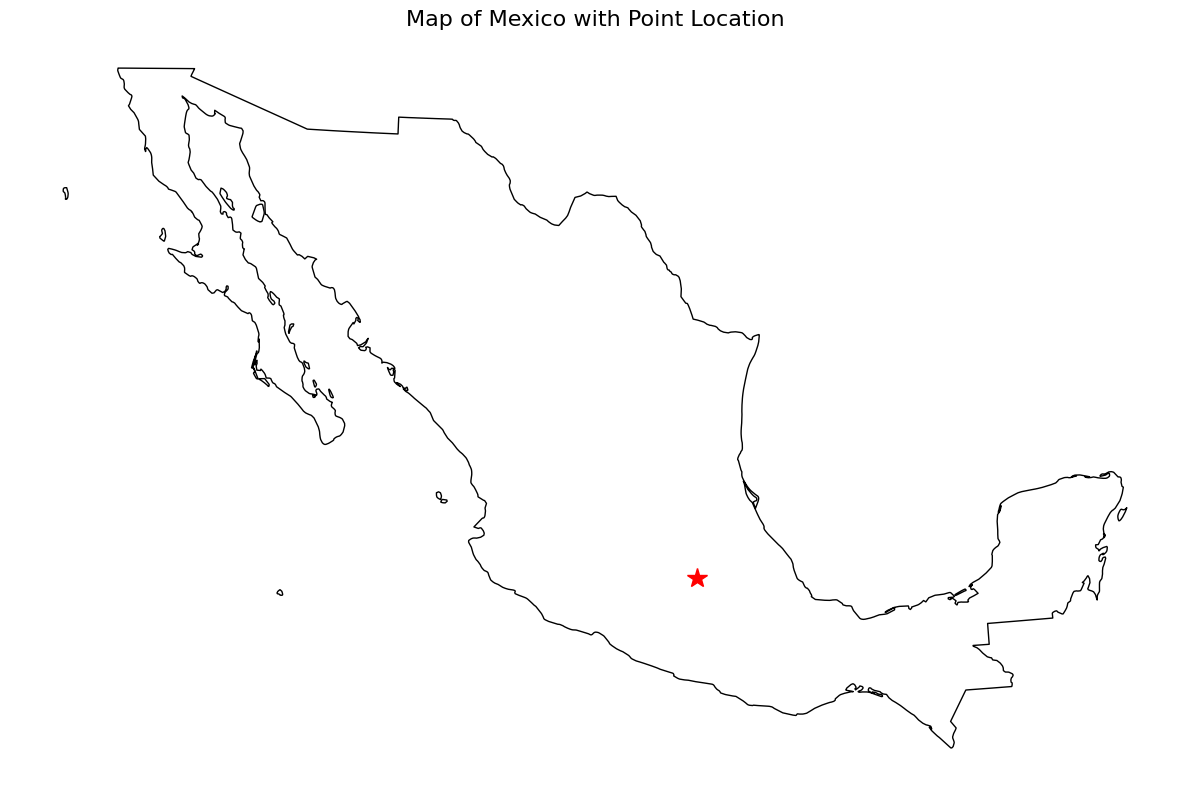

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile
world = gpd.read_file('World_Countries_(Generalized)/World_Countries_Generalized.shp')

# Ensure the shapefile is in WGS 84
if world.crs != 'EPSG:6372':
    world = world.to_crs(epsg=6372)


mexico = world[world['COUNTRY'] == 'Mexico']

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Mexico
mexico.plot(ax=ax, color='white', edgecolor='black')

# Add a specific point (example: Mexico City coordinates)
longitude = 2800163.325798929
latitude = 829057.5193839237
ax.plot(longitude, latitude, marker='*', color='red', markersize=15, label='Mexico City')

# Add a text label
# ax.annotate('Mexico City', 
#            xy=(longitude, latitude), 
#            xytext=(10, 10),
#            textcoords='offset points',
#            fontsize=12)

# Customize the plot
plt.title('Map of Mexico with Point Location', fontsize=16)
ax.axis('off')

plt.tight_layout()
plt.show()

100%|██████████| 318/318 [00:00<00:00, 377.91it/s]


starting clipping
done clipping
plotting mexico
plotting grid


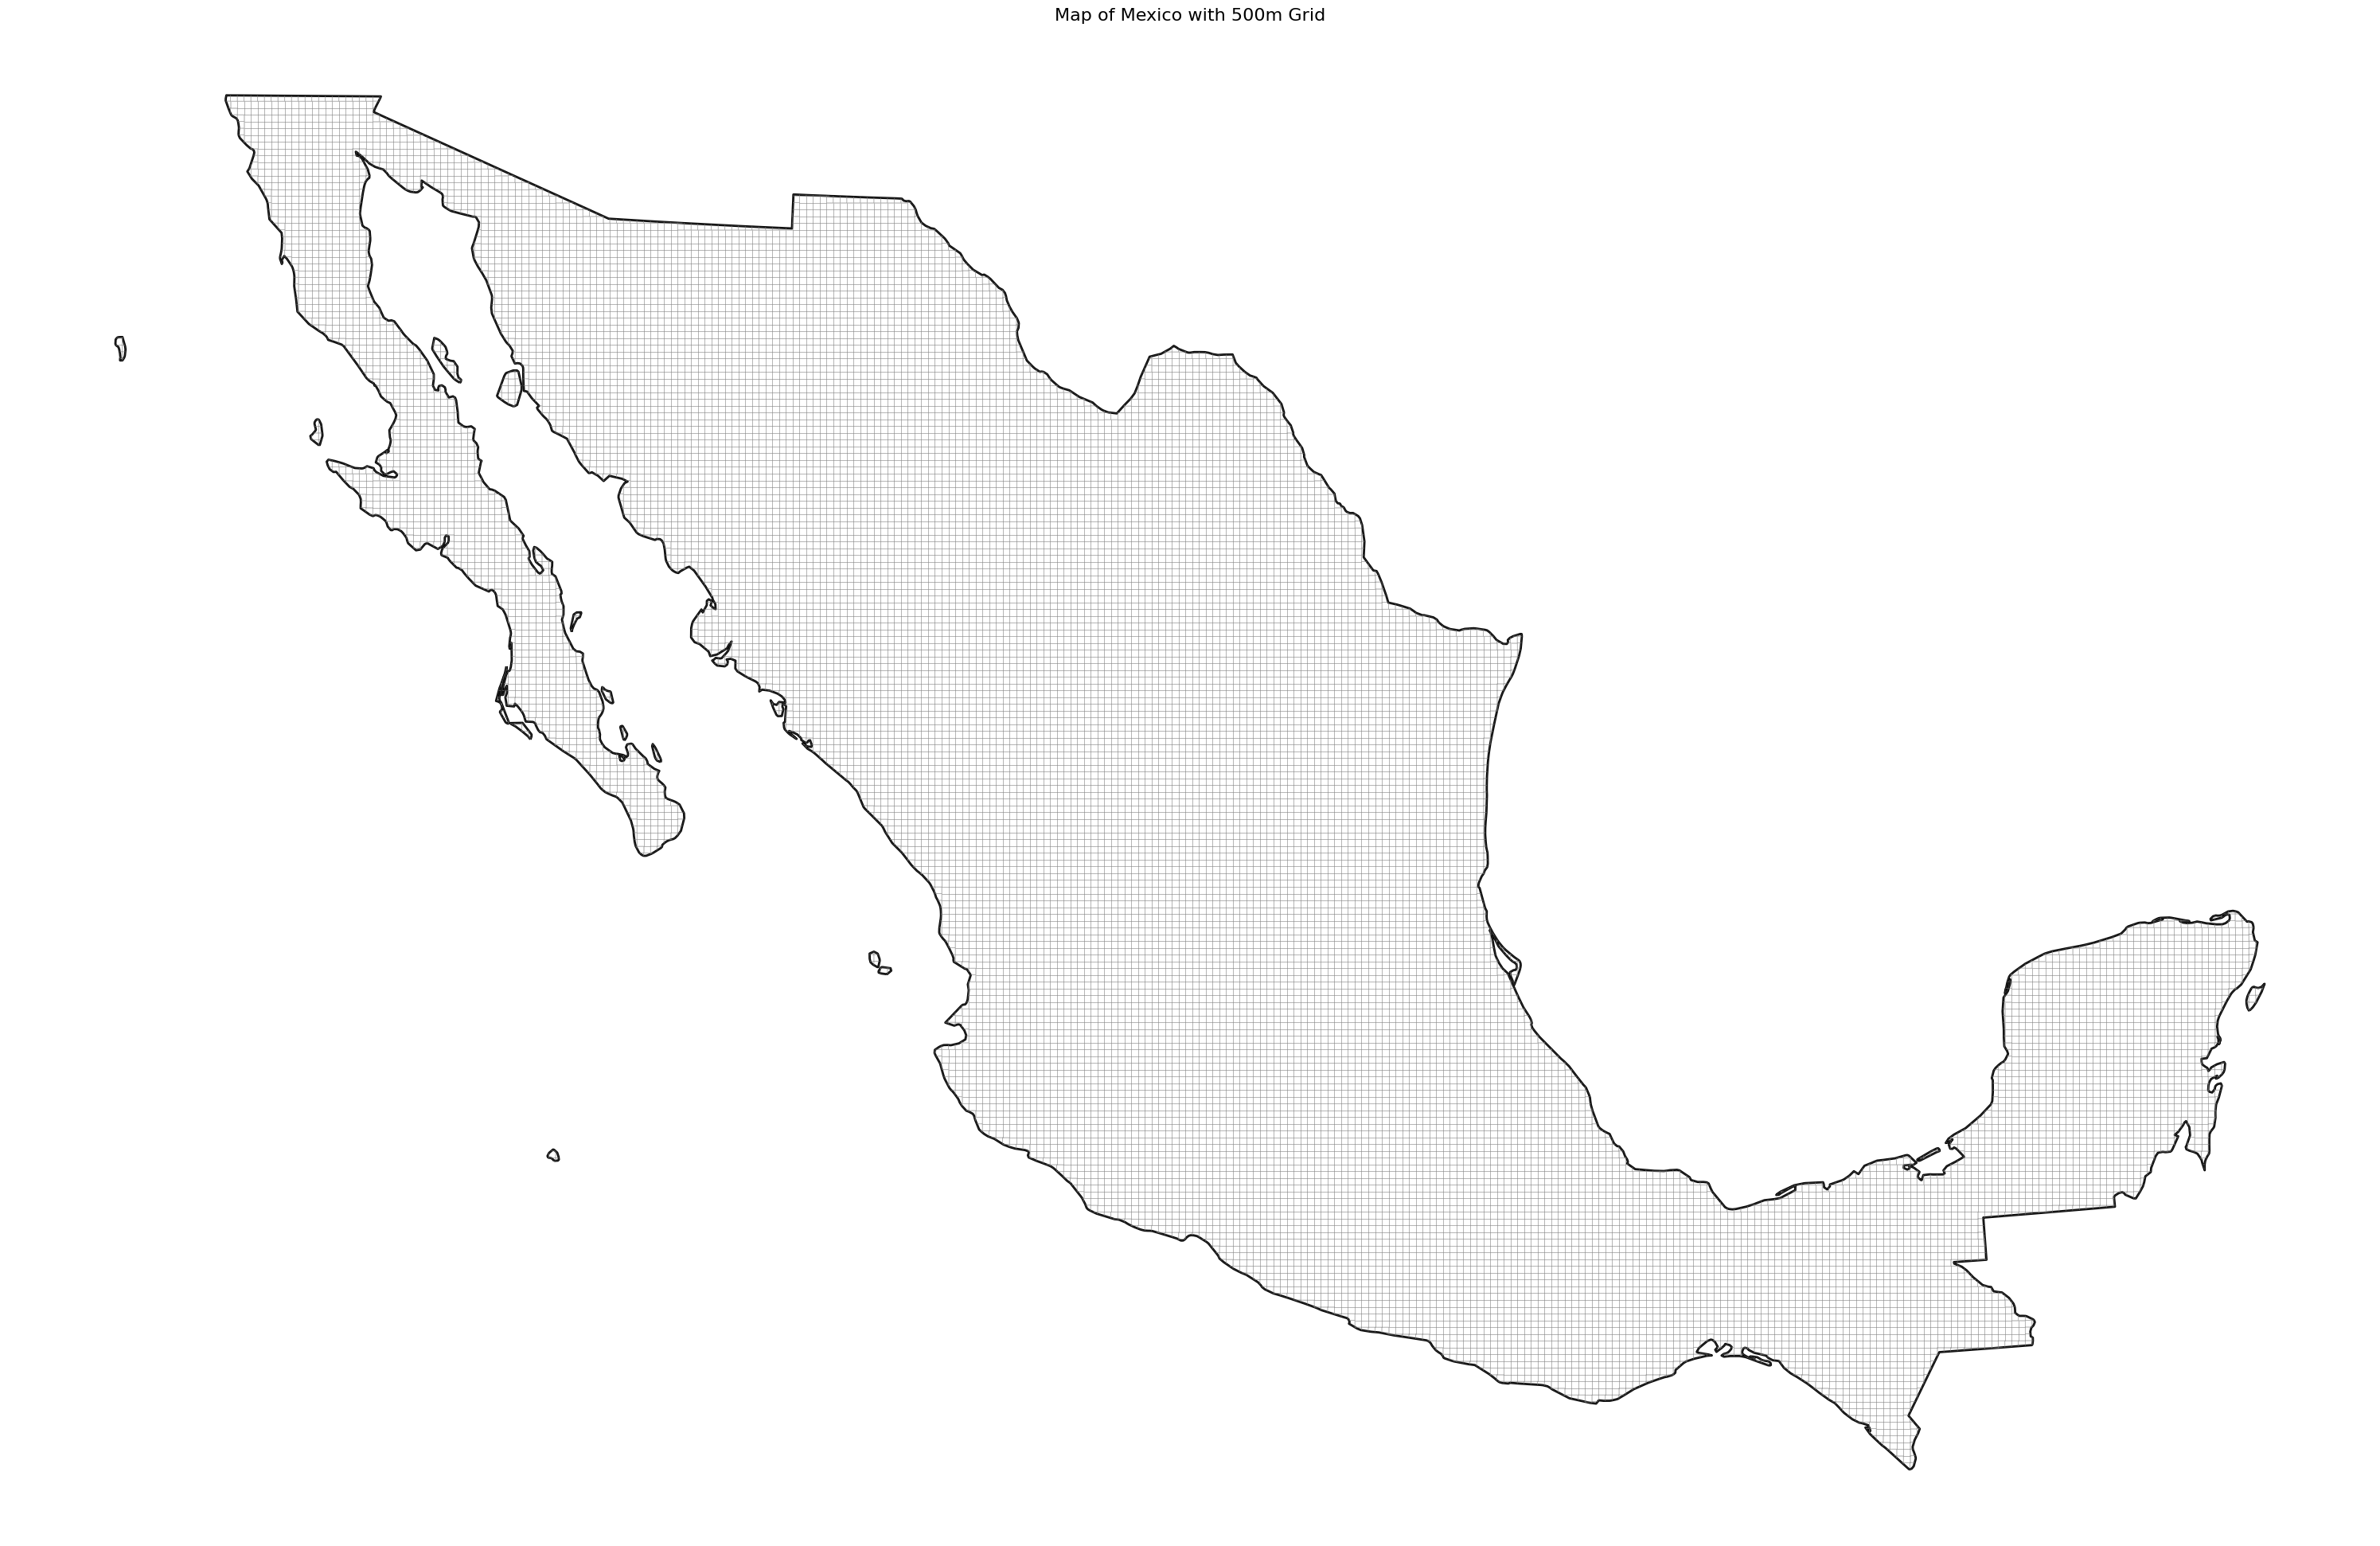

In [7]:
import numpy as np
from tqdm import tqdm
from shapely.geometry import box

mexico_utm = mexico.to_crs(epsg=6372)

# Get the bounds of Mexico in UTM coordinates
minx, miny, maxx, maxy = mexico_utm.total_bounds

# Create grid cells of 500m
cell_size = 10000  # meters
x_coords = np.arange(minx, maxx, cell_size)
y_coords = np.arange(miny, maxy, cell_size)

# Create grid cells
grid_cells = []
for x in tqdm(x_coords):
    for y in y_coords:
        cell = box(x, y, x + cell_size, y + cell_size)
        grid_cells.append(cell)

# Create GeoDataFrame from grid
grid = gpd.GeoDataFrame(geometry=grid_cells, crs=mexico_utm.crs)

print("starting clipping")
# Clip grid to Mexico's boundary
grid_clipped = gpd.clip(grid, mexico_utm)
print("done clipping")

# Create the plot
fig, ax = plt.subplots(figsize=(30, 20))

# Plot Mexico
print("plotting mexico")
mexico_utm.plot(ax=ax, color='white', edgecolor='black', linewidth=2)

# Plot grid
print("plotting grid")
grid_clipped.plot(ax=ax, facecolor='none', edgecolor='grey', alpha=0.5, linewidth=0.5)

# Customize the plot
plt.title('Map of Mexico with 500m Grid', fontsize=16)
ax.axis('off')

plt.tight_layout()
plt.show()